#CUDA Checking#

**Installation:** https://developer.nvidia.com/cuda-downloads

In [ ]:
import torch

def check_cuda():
    if torch.cuda.is_available():
        print("CUDA is available!")
        device_count = torch.cuda.device_count()
        print(f"Number of CUDA devices: {device_count}")
        for i in range(device_count):
            print(f"Device {i}: {torch.cuda.get_device_name(i)}")
            print(f"Memory allocated: {torch.cuda.memory_allocated(i)} bytes")
            print(f"Memory reserved: {torch.cuda.memory_reserved(i)} bytes")
    else:
        print("CUDA is not available.")

check_cuda()


CUDA is available!
Number of CUDA devices: 1
Device 0: Tesla T4
Memory allocated: 17196032 bytes
Memory reserved: 23068672 bytes


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Steps to Detect Bias and Variance in Reinforcement Learning Using Python
###Learning Curve Analysis: Track the rewards or return over time (episodes). A consistently high reward with little variance indicates low bias and low variance. If the model is unable to learn a good policy (low reward), this may indicate high bias (underfitting). On the other hand, large fluctuations in the reward might suggest high variance (overfitting).

Evaluate Policies:

**Bias:** If the learned policy performs poorly even after training for many episodes, the model has high bias.

**Variance:** If the performance of the policy varies significantly across different runs with different random seeds, it may have high variance.

In [ ]:
! pip install stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 13.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.4 MB/s eta 0:00:00
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446661 sha256=5b3d6ed97e0bc8b89e7b47e26da8515a736fc8ee3b74a53fc6beeb4c7f434dbd
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


Explanation:
* **Learning Curve:** The rewards per episode are plotted, which shows how well the agent is performing. A consistently low reward indicates high bias, while large fluctuations in reward over episodes indicate high variance.
* **Average Reward (Bias):** A low average reward points to high bias, where the policy is not adequately learning the task.
* **Reward Variance (Variance):** A high variance indicates that the agent's performance is inconsistent and highly variable across episodes.

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/usr/local/lib/python3.10/dist-packages/gymnasium/envs/classic_control/cartpole.py:180: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


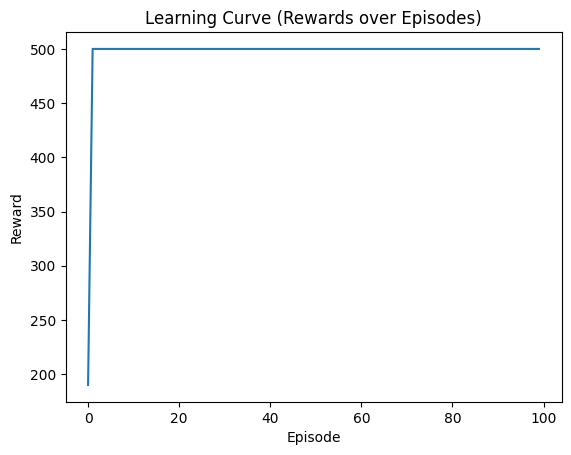

Average Reward (Bias): 496.9
Reward Variance (Variance): 951.3900000000001


In [ ]:
import gymnasium as gym  # Import Gymnasium instead of Gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO

# Create the CartPole environment using Gymnasium
env = gym.make('CartPole-v1')

# Define the model (PPO in this case)
model = PPO('MlpPolicy', env, verbose=0)

# Train the model
timesteps = 10000
rewards = []
episodes = 100

for episode in range(episodes):
    model.learn(total_timesteps=timesteps, reset_num_timesteps=False)

    # Evaluate performance on the environment
    obs, info = env.reset()  # The reset method now returns two values: obs and info
    episode_reward = 0
    done, truncated = False, False  # Modify to handle new API
    while not done and not truncated:  # Check both done and truncated
        action, _states = model.predict(obs)
        obs, reward, done, truncated, info = env.step(action)  # The step method now returns truncated
        episode_reward += reward
    rewards.append(episode_reward)

# Plot learning curve (rewards over episodes)
plt.plot(rewards)
plt.title("Learning Curve (Rewards over Episodes)")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

# Calculate bias (average reward) and variance (spread of rewards)
mean_reward = np.mean(rewards)
reward_variance = np.var(rewards)

print(f"Average Reward (Bias): {mean_reward}")
print(f"Reward Variance (Variance): {reward_variance}")


#Examples of Bias-Variance Tradeoff in RL#
##Model-Free vs. Model-Based RL:##

Model-free RL algorithms (like Q-learning or policy gradients) tend to have high variance because they rely on sampling trajectories from the environment. These methods learn directly from experience, which can be noisy and unstable.

Model-based RL algorithms, which build a model of the environment, can introduce bias because the model might simplify the dynamics of the environment too much. However, model-based methods can reduce variance by providing more structured and consistent feedback.

##Value Function Approximation:##
When using function approximators (e.g., neural networks) to estimate value functions or policies:

If the network is too simple (e.g., a shallow neural network), it may introduce high bias (underfitting).

If the network is too complex (e.g., a deep neural network), it may have high variance due to overfitting to specific state-action pairs.

##Exploration vs. Exploitation:##
RL involves an exploration-exploitation tradeoff, which is analogous to the bias-variance tradeoff:

If an agent exploits too much (i.e., greedily choosing actions that have previously resulted in high rewards), it may underfit the environment, leading to high bias.

If an agent explores too much, it may spend too much time trying suboptimal actions, leading to high variance in the returns.

#Techniques to Address Bias-Variance Tradeoff in RL#
**Regularization:** Similar to supervised learning, regularization techniques (such as L2 regularization or dropout in neural networks) can help reduce overfitting and control variance in RL models.

**Bootstrapping:** Temporal Difference (TD) methods in RL use bootstrapping, which can introduce bias (because it updates values based on estimates) but can help reduce variance by providing smoother updates.

**Averaging Across Policies:** Algorithms like Actor-Critic methods combine policy-based (low bias, high variance) and value-based methods (high bias, low variance) to balance the tradeoff.

**Experience Replay:** In deep RL (e.g., Deep Q-Learning), using a replay buffer to sample past experiences helps reduce variance by breaking correlations between consecutive experiences.